# Aim
- **Objective:**  
  Implement and evaluate a Single Layer Perceptron for binary classification on both linearly separable and non-linearly separable datasets.
- **Workflow:**  
  Generate synthetic datasets (one linearly separable using `make_classification` and one non-linearly separable using `make_circles`), train the Perceptron on these datasets (as well as a real-world dataset like Breast Cancer), and assess its performance using accuracy and visualizations.

# Algorithm
1. **Data Preparation and Exploration:**
   - Generate a synthetic 2D dataset using `make_classification` for a linearly separable scenario.
   - Explore the dataset using descriptive statistics, correlation matrices, distribution plots, and pair plots.
2. **Perceptron Implementation:**
   - Define a custom `Perceptron` class with an initialization of weights and bias.
   - Implement an activation function (step function), a `fit` method for training with weight updates using stochastic gradient descent and a learning rate decay, and a `predict` method.
3. **Model Training and Evaluation on Synthetic Data:**
   - Split the synthetic data into training and testing sets.
   - Train the Perceptron on the training data and evaluate its performance on the test set using accuracy.
4. **Evaluation on Real-World and Non-Linearly Separable Data:**
   - Train and evaluate the Perceptron on the Breast Cancer dataset (after scaling) to observe performance on real-world data.
   - Generate a non-linearly separable dataset using `make_circles`, train the Perceptron, and assess its accuracy.
5. **Visualization:**
   - Visualize the data distributions, correlations, and decision boundaries (if applicable) to gain insights into the data and model behavior.

# Algorithm Description
- **Single Layer Perceptron:**  
  The Perceptron is a simple linear classifier that updates its weights and bias based on the error between the predicted and actual outputs. It uses a step activation function that outputs a binary class label. During training, the algorithm adjusts its parameters using a learning rate (which may decay over epochs) to minimize misclassifications.
  
- **Handling Linearly Separable vs. Non-Linearly Separable Data:**  
  - For linearly separable data (e.g., generated via `make_classification`), the Perceptron converges to a solution that perfectly separates the classes, achieving high accuracy.
  - For non-linearly separable data (e.g., generated via `make_circles`), the inherent limitation of a single linear decision boundary is highlighted, often resulting in lower performance.
  
- **Evaluation and Visualization:**  
  The performance of the Perceptron is quantified using accuracy metrics on both synthetic and real-world datasets. Visualization techniques (scatter plots, pair plots, and correlation matrices) are employed to understand data distributions and the effectiveness of the classifier.

## Results

### 1. Synthetic Linearly Separable Data (make_classification)
- **Accuracy:** ~92.5%
- The Perceptron effectively learned the decision boundary on the synthetic, linearly separable dataset, achieving high accuracy.

### 2. Real-World Data (Breast Cancer)
- **Unscaled Data Accuracy:** ~95.32%
- **Scaled Data Accuracy:** ~94.15%
- The Perceptron performed robustly on the Breast Cancer dataset. While the unscaled data yielded slightly higher accuracy, scaling the features still resulted in strong performance.

### 3. Non-Linearly Separable Data (Circles)
- **Accuracy:** ~70.0%
- The Perceptron struggled with the non-linearly separable circle dataset, highlighting its limitation with data that requires a non-linear decision boundary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [3]:
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df

,Feature 1,Feature 2,Target
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,2.844315,0.211294,1
998,-0.025876,1.619258,1


In [4]:
df.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.000000
mean,1.025840,-0.012693,0.499000
std,1.071457,1.225378,0.500249
min,-2.472718,-2.850971,0.000000
25%,0.307209,-0.984268,0.000000
50%,1.023750,-0.102945,0.000000
75%,1.724713,0.973550,1.000000
max,4.138715,3.342864,1.000000


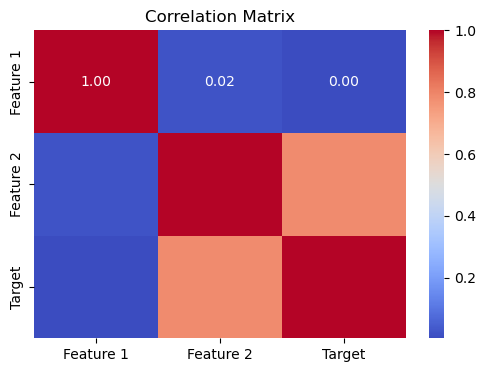

In [5]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

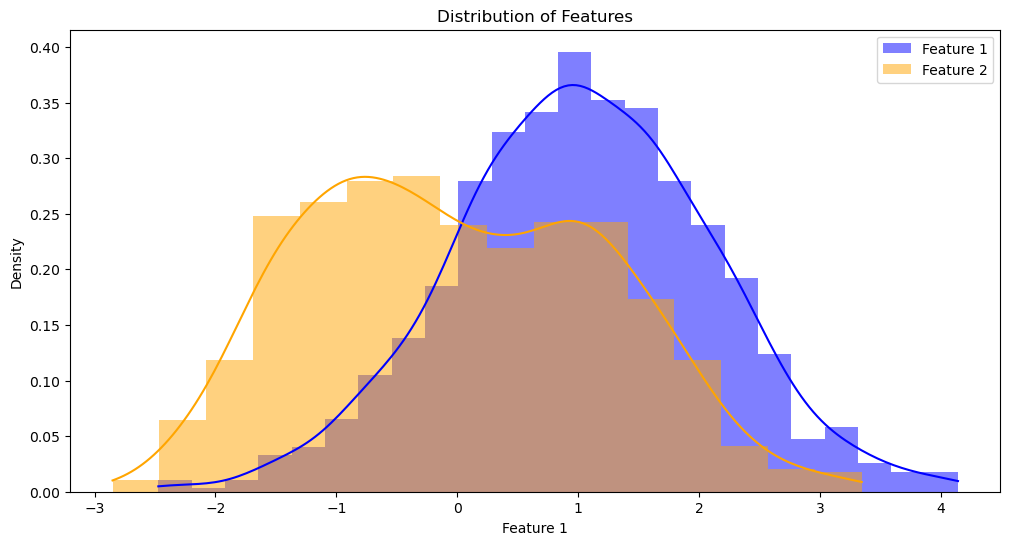

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Feature 1"], kde=True, color="blue", label="Feature 1", stat="density", linewidth=0)
sns.histplot(df["Feature 2"], kde=True, color="orange", label="Feature 2", stat="density", linewidth=0)
plt.title('Distribution of Features')
plt.legend()
plt.show()

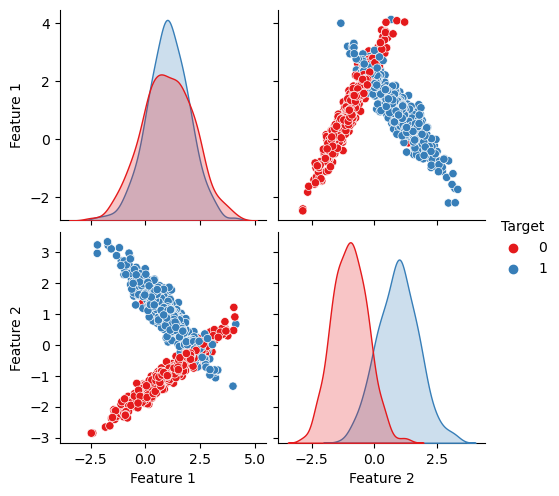

In [7]:
sns.pairplot(df, hue="Target", palette="Set1")
plt.show()

In [8]:
class Perceptron:

    def __init__(self, learning_rate:float = 0.00001, epoch:int = 100_000, decay_rate: float = 0.975):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.decay_rate = decay_rate
        self.weight = None
        self.bias = None

    def activation_function(self, x):
        return 1 if x >=0 else 0

    def fit(self, X:np.ndarray, y:np.ndarray):

        self.weight = np.random.randn(X.shape[1]) * 0.01
        self.bias = 0
        prev_weights = np.copy(self.weight) # To monitor convergence

        for epoch in range(1, self.epoch+1):

            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            total_error = 0

            for i in range(len(X_shuffled)):

                # Forward Pass
                weighted_sum = np.dot(X_shuffled[i], self.weight) + self.bias
                predicted = self.activation_function(weighted_sum)

                # Calculate error
                error = y_shuffled[i] - predicted
                total_error += abs(error)

                # Update weights
                self.weight += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error

            self.learning_rate *= self.decay_rate

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}/{self.epoch}, Total error: {total_error}", end='\r')

            if np.all(np.abs(self.weight - prev_weights) < 1e-100):
                print(f"Convergence reached at epoch {epoch}.")
                break

            prev_weights = np.copy(self.weight)

    def predict(self, X:np.ndarray):

        results = []

        for i in range(len(X)):
            weighted_sum = np.dot(X[i], self.weight) + self.bias
            pred = self.activation_function(weighted_sum)

            results.append(pred)

        return np.array(results)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

In [10]:
model = Perceptron()

In [11]:
model.fit(X_train, y_train)

Convergence reached at epoch 8607.5


In [12]:
pred_i = model.predict(X_test)
pred_i

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0])

In [13]:
accuracy_score(y_true=y_test, y_pred=pred_i) * 100

89.2

In [14]:
accuracy = np.mean(pred_i == y_test)
accuracy * 100

89.2

# Breast Cancer

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [16]:
data = load_breast_cancer()
X, y  = data.data, data.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model1 = Perceptron(learning_rate=1000)

In [20]:
model1.fit(X_train_scaled, y_train)

Convergence reached at epoch 105.


In [21]:
prediction = model1.predict(X_test_scaled)
prediction

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [22]:
accuracy_score(y_true=y_test, y_pred=prediction) * 100

94.15204678362574

### 95.32163742690058 -> 0.00001 -> Unscaled
### 94.15204678362574 -> 0.01 -> Scaled

# Circle Dataset

In [23]:
from sklearn.datasets import make_circles

In [24]:
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

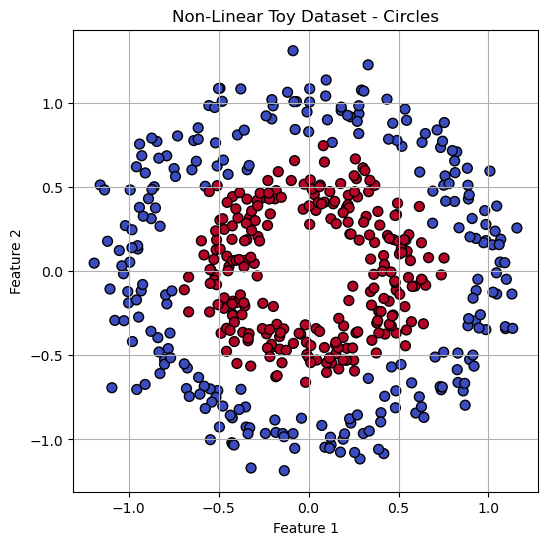

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='black')
plt.title("Non-Linear Toy Dataset - Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [27]:
print("Sample data points (X, y):")
print(X[:10], y[:10])

Sample data points (X, y):
[[-0.46918557  0.24791499]
 [-0.06748724  1.00676912]
 [-0.44306526  0.02738322]
 [-0.61172505 -0.6314071 ]
 [-0.78901285  0.68451888]
 [-0.42136979 -0.25688616]
 [-0.45473954  0.08850207]
 [-0.94954151  0.13119395]
 [-0.20468777  0.903653  ]
 [ 0.10000474 -0.60226649]] [1 0 1 0 0 1 1 0 0 1]


In [28]:
model2 = Perceptron()

In [29]:
model2.fit(X_train, y_train)

Convergence reached at epoch 8587.4


In [30]:
prediction = model2.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
accuracy_score(y_true=y_test, y_pred=prediction) * 100

56.99999999999999